In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Reads data from csv file and converts to numpy array
MW_data = pd.read_csv('SofueData.txt',sep=' ',names=['Rkpc','Vkms', 'VErr'])
R_kpc = MW_data['Rkpc'].to_numpy()
R_m = R_kpc*10**19
V_km_s = MW_data['Vkms'].to_numpy()
V_m_s = V_km_s*1000
V_Err = MW_data['VErr']

/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5, 1.0, 'Milky Way Rotation Curve')

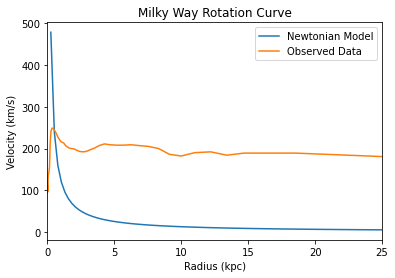

In [11]:
# Newtonian Model vs Observed Data for Chapter 1

G = 6.67*10**(-11)
R = 0.8*10**21
M = 5.8*10**34

v_newt = []
for i in np.linspace(0, R, num=100):
    v = (G*M)/(i)
    v /= 1000 
    v_newt.append(v)
    
plt.plot(np.linspace(0,R,num=100)/(3.086*10**19),v_newt,label='Newtonian Model')
plt.plot(R_kpc, V_km_s, label='Observed Data')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.xlim([0, 25])
plt.legend()
plt.title('Milky Way Rotation Curve')

Text(0.5, 1.0, 'Milky Way Rotation Curve')

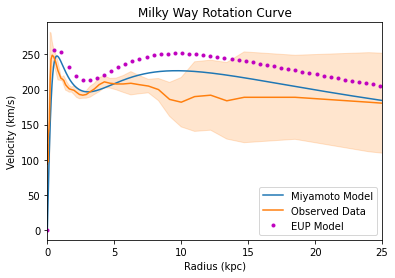

In [45]:
# Matching Miyamoto Model and Miyamoto EUP Model to Sofue data for Chapter 3

M_Sun = 2*10**30
R = 0.8*10**21
M1 = 1.8*10**10*M_Sun
M2 = 20.547*10**10*M_Sun
M1_ = 1.2*10**10*M_Sun
M2_ = 3.635*10**10*M_Sun
a1 = 0
a2 = 7.258*3.086*10**19
b1 = 0.495*3.086*10**19
b2 = 0.520*3.086*10**19

G = 6.67*10**(-11)
c = 3*10**8
L_star = 0.5*10**14
EUP_M1 = 1+((4*G**2*M1_**2)/(c**4*L_star**2))
EUP_M2 = 1+((4*G**2*M2_**2)/(c**4*L_star**2))

v_vals = []
v_vals_EUP = []

for i in np.linspace(0,R,num=10000):

    eq1 = (G*M1)/((i**2+(a1+b1)**2)**(3/2))
    eq2 = (G*M2)/((i**2+(a2+b2)**2)**(3/2))
    

    v = i*(eq1+eq2)**(1/2)
    v /= 1000
    v_vals.append(v)
    
for i in np.linspace(0,R,num=50):
    
    eq1_EUP = (G*M1_)/((i**2+(a1+b1)**2)**(3/2))
    eq2_EUP = (G*M2_)/((i**2+(a2+b2)**2)**(3/2))

    v_EUP = i*(((eq1_EUP*EUP_M1)+(eq2_EUP*EUP_M2))**(1/2))
    v_EUP /= 1000
    v_vals_EUP.append(v_EUP)

# Reads data from csv file and converts to numpy array
V_km_s_up = []
V_km_s_down = []

for i in range(len(V_Err)):
    up = V_km_s[i] + V_Err[i]
    V_km_s_up.append(up)
    down = V_km_s[i] - V_Err[i]
    V_km_s_down.append(down)

original = True
modified = True

if original:
    plt.plot(np.linspace(0,R,num=10000)/(3.086*10**19),v_vals, label='Miyamoto Model')
plt.plot(R_kpc, V_km_s, label='Observed Data')
plt.fill_between(R_kpc, V_km_s_up, V_km_s_down, color='C1', alpha=0.2)
if modified:
    plt.plot(np.linspace(0,R,num=50)/(3.086*10**19),v_vals_EUP,'m.',label='EUP Model')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.xlim([0, 25])
plt.legend(loc=4)
plt.title('Milky Way Rotation Curve')

Text(0.5, 1.0, 'Comparison of L_star')

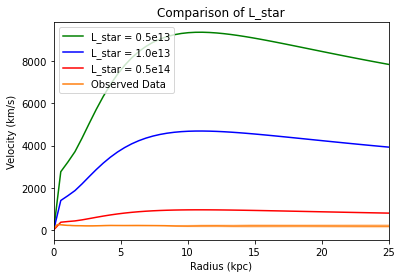

In [44]:
# Showing the effects of changing L_star for Chapter 3

M_Sun = 2*10**30
R = 0.8*10**21
a1 = 0
a2 = 7.258*3.086*10**19
b1 = 0.495*3.086*10**19
b2 = 0.520*3.086*10**19
G = 6.67*10**(-11)
c = 3*10**8

R_list = [np.linspace(0,R,num=50)/(3.086*10**19)]*3
L_star_list = [0.5*10**13, 10**13, 0.5*10**14]
#list_M1_ = [3.64*10**9*M_Sun, 5.55*10**9*M_Sun, 1.29*10**10*M_Sun]
#list_M2_ = [8.90*10**9*M_Sun, 1.4*10**10*M_Sun, 3.95*10**10*M_Sun]
list_M1_ = [1.8*10**10*M_Sun]*3
list_M2_ = [1.05*10**11*M_Sun]*3
labels = ['L_star = 0.5e13', 'L_star = 1.0e13', 'L_star = 0.5e14']
colors = ['green', 'blue', 'red']

v_vals_EUP_list = []

for L_star, M1_, M2_ in zip(L_star_list, list_M1_, list_M2_):
    
    EUP_M1 = 1+((4*G**2*M1_**2)/(c**4*L_star**2))
    EUP_M2 = 1+((4*G**2*M2_**2)/(c**4*L_star**2))
    
    v_vals_EUP = []
    
    for i in np.linspace(0,R,num=50):
    
        eq1_EUP = (G*M1_)/((i**2+(a1+b1)**2)**(3/2))
        eq2_EUP = (G*M2_)/((i**2+(a2+b2)**2)**(3/2))

        v_EUP = i*(((eq1_EUP*EUP_M1)+(eq2_EUP*EUP_M2))**(1/2))
        v_EUP /= 1000
        v_vals_EUP.append(v_EUP)
        
    v_vals_EUP_list.append(v_vals_EUP)

observed = True

for x, y, label, color in zip(R_list, v_vals_EUP_list, labels, colors):
    plt.plot(x, y, label=label, color=color)

if observed:
    plt.plot(R_kpc, V_km_s, color='C1',label='Observed Data')
    plt.fill_between(R_kpc, V_km_s_up, V_km_s_down, color='C1', alpha=0.2)
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.xlim([0, 25])
plt.legend(loc='best')
plt.title('Comparison of L_star')

Text(0.5, 1.0, 'Milky Way Rotation Curve')

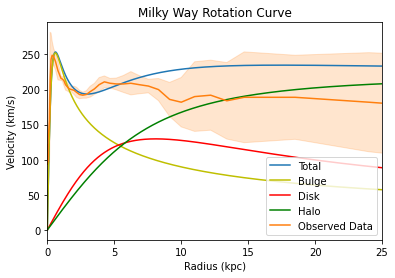

In [55]:
# Flynn Model for Chapter 4

M_Sun = 2*10**30
G = 6.67*10**(-11)
R = 0.8*10**21
M_b1 = 3.0*10**9*M_Sun
M_b2 = 1.6*10**10*M_Sun
M_d1 = 6.6*10**10*M_Sun
M_d2 = -2.9*10**10*M_Sun
M_d3 = 3.3*10**9*M_Sun
r_b1 = 2.7*3.086*10**19
r_b2 = 0.42*3.086*10**19
b = 0.3*3.086*10**19
a1 = 5.81*3.086*10**19
a2 = 17.43*3.086*10**19
a3 = 34.86*3.086*10**19
r0 = 8.5*3.086*10**19
Vh = 220*10**3

v_vals_total = []
v_vals_eq_b = []
v_vals_eq_d = []
v_vals_eq_h = []

for i in np.linspace(0,R,num=1000):
    
    eq_b1 = (G*M_b1*i**2)/((i**2+r_b1**2)**(3/2))
    eq_b2 = (G*M_b2*i**2)/((i**2+r_b2**2)**(3/2))
    eq_d1 = (G*M_d1*i**2)/((i**2+(a1+b)**2)**(3/2))
    eq_d2 = (G*M_d2*i**2)/((i**2+(a2+b)**2)**(3/2))
    eq_d3 = (G*M_d3*i**2)/((i**2+(a3+b)**2)**(3/2))
    eq_h = (Vh**2*i**2)/(i**2+r0**2)


    v_total = (eq_b1+eq_b2+eq_d1+eq_d2+eq_d3+eq_h)**(1/2)
    v_total /= 1000
    v_vals_total.append(v_total)
    
    v_eq_b = (eq_b1+eq_b2)**(1/2)
    v_eq_b /= 1000
    v_vals_eq_b.append(v_eq_b)
    
    v_eq_d = (eq_d1+eq_d2+eq_d3)**(1/2)
    v_eq_d /= 1000
    v_vals_eq_d.append(v_eq_d)
    
    v_eq_h = (eq_h)**(1/2)
    v_eq_h /= 1000
    v_vals_eq_h.append(v_eq_h)
    
# Reads data from csv file and converts to numpy array
V_km_s_up = []
V_km_s_down = []

for i in range(len(V_Err)):
    up = V_km_s[i] + V_Err[i]
    V_km_s_up.append(up)
    down = V_km_s[i] - V_Err[i]
    V_km_s_down.append(down)
    
plt.plot(np.linspace(0,R,num=1000)/(3.086*10**19),v_vals_total, label='Total')
plt.plot(np.linspace(0,R,num=1000)/(3.086*10**19),v_vals_eq_b, 'y-', label='Bulge')
plt.plot(np.linspace(0,R,num=1000)/(3.086*10**19),v_vals_eq_d, 'r-', label='Disk')
plt.plot(np.linspace(0,R,num=1000)/(3.086*10**19),v_vals_eq_h, 'g-', label='Halo')

plt.plot(R_kpc, V_km_s, color='C1', label='Observed Data')
plt.fill_between(R_kpc, V_km_s_up, V_km_s_down, color='C1', alpha=0.2)
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.xlim([0, 25])
plt.legend(loc=4)
plt.title('Milky Way Rotation Curve')